### Algorithm
- Suppose we have a (1000,2) size data
1. #### Preprocessing
    - Find a vector, for projecting the data points on it

2. #### Covariance matrix
    - For 2 features, we get a 2 x 2 matrix
$$Cov(x,y) = \sum\limits_{i=1}^m\dfrac{(x - \bar{x})(y - \bar{y})}{N-1}$$
Hence are matrix looks like,
$$ \begin{bmatrix} Cov(x_1, x_1) & Cov(x_1, x_2) \\
Cov(x_2, x_1) & Cov(x_2, x_2) \end{bmatrix} $$
Which turns out to be a symmetric matrix
  

3. #### Eigen vector calculation
    - Find the eigen vector the get the direction of the vector for projecting
    - We use a function called `SVD` (Singular Value Decompositions)
    - SVD gives us U, S, V
    - We only use U
    - U is a $n \times n$ matrix, and we choose the best k
    - `U = U[:, :k]` $(n \times k)$

4. #### Projection
    - $Z^{(i)} = U_{red}^T \times x^{(i)} $
    - To get Z of $(k \times 1)$ shape

### Implementation

In [1]:
# Importing MNIST again, from Keras this time
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000,))

#### Visualising one row

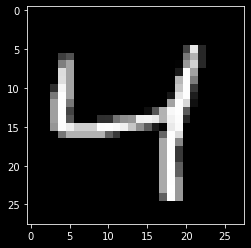

In [3]:
plt.imshow(x_train[2], cmap="gray")
plt.show()

We see all the data are images of $(28 \times 28)$ and show a number to be classified

In [4]:
X_ = x_train.reshape(-1, 28*28)
X_.shape

(60000, 784)

We now have 784 features for every row

#### Using SkLearn to scale our data

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()

In [7]:
X_ = sc.fit_transform(X_)
X_.shape

(60000, 784)

Our data has been rescaled for $\mu = 0$ and $\sigma = 1$

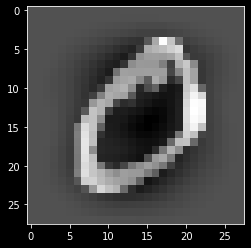

In [8]:
plt.imshow(X_[1].reshape(28,28), cmap="gray")
plt.show()

Our data is still intact, just a bit hazed

### PCA using inbuilt SKLearn